# Load results to compare the summary networks

In [1]:
# load the results images and plot them next to each other
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

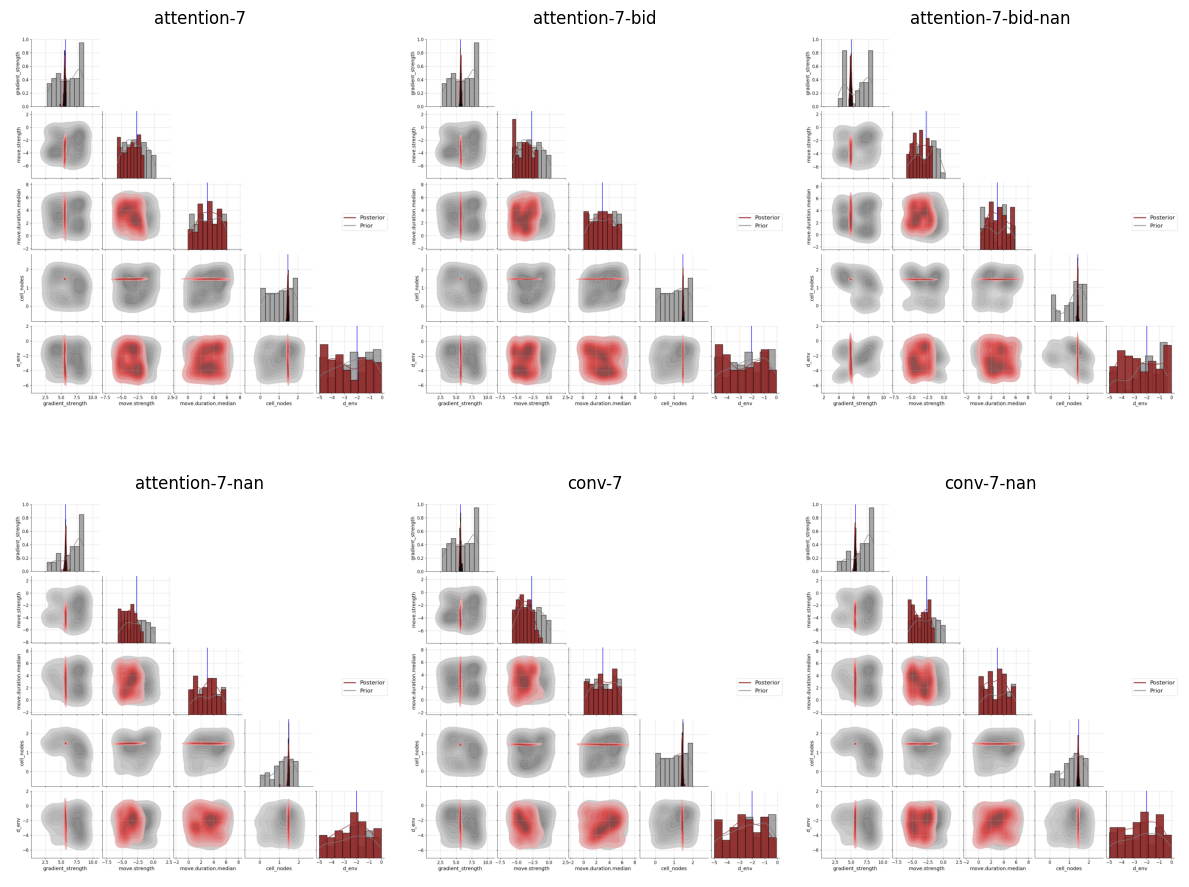

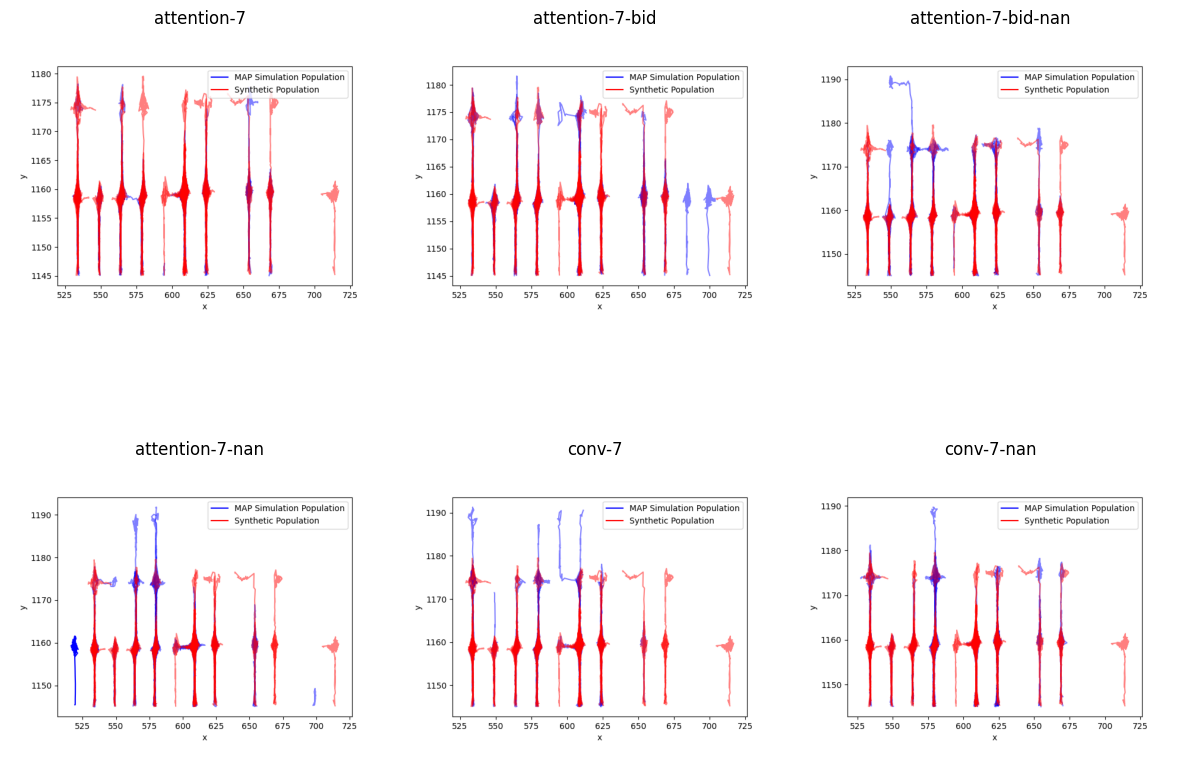

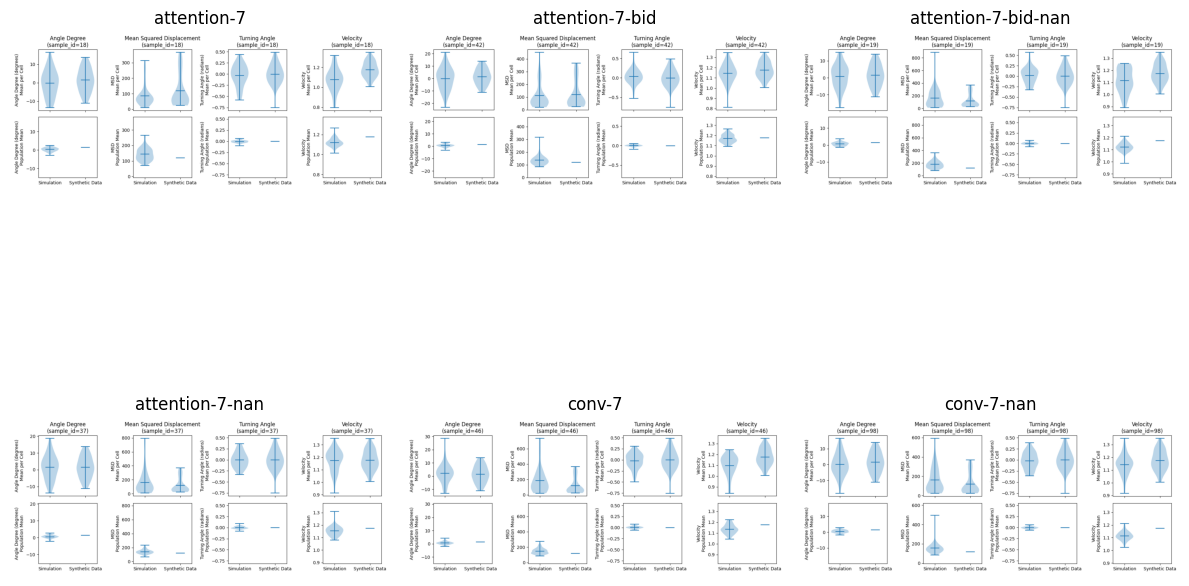

In [2]:
# get all folders in the current directory
folders = [f for f in os.listdir() if os.path.isdir(f)]
folders.sort()
# open all folders and plot them in a row
result_images = ["posterior_vs_prior.png", "Simulations.png", "Summary Stats.png"]

for img_name in result_images:
    fig, ax = plt.subplots(2, len(folders) // 2, tight_layout=True, figsize=(12, 10))
    ax = ax.flatten()
    for i, folder in enumerate(folders):
        img = mpimg.imread(os.path.join(folder, img_name))
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(folder[25:])    
    plt.show()

Results are very similar
- all networks converged and are calibrated well
- attention did improve the results
- bidirectional lstm slightly improved the summary statistics
- only two of five parameters are identifiable
- simulations seems quite accurate
- removing all nan samples made the results worse

Kolmogorov-Smirnov (KS) test
- attention-7 only for "Velocity" significantly different distribution
- attention-7-bid shows no significant difference in summary statistics distributions